In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import transform
from skimage import io, img_as_float
import numpy as np
import glob
from scipy import ndimage
import os
from loguru import logger
import pandas as pd

In [2]:
from skimage.filters import try_all_threshold, threshold_otsu, threshold_yen, gaussian

# Testing

In [3]:
# pip install scikit-image

In [28]:
pwd = "./Before and after pictures/B26"
# pwd = "./Before and after pictures/M19"
img_paths = os.listdir(pwd)
img_paths

['After B26.jpg', 'Before B26.jpg']

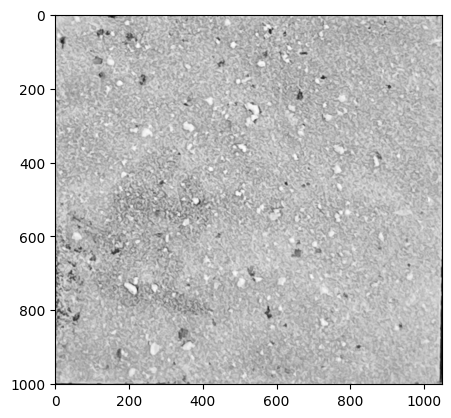

In [30]:
b_img = io.imread(f"{pwd}/{img_paths[1]}", as_gray=True)
plt.imshow(b_img, cmap="gray")

In [31]:
def get_pixel_count(og_img: np.ndarray, debug=False, fname="", new_size=(1000, 1000)):
    resized_img = transform.resize(og_img, new_size, anti_aliasing=True)
    img = gaussian(resized_img, sigma=3.0)
    threshold = threshold_yen(img)
    logger.info(f"Best threshold {threshold}")
    binary_img = img >= threshold
    logger.info(f"Original Image {og_img.shape} -> {binary_img.shape}")
    
    if fname:
        logger.info(fname)
        io.imsave(f"binary_output/bin_{fname}", binary_img)
        io.imsave(f"resized_images/R_{fname}", (resized_img * 255).astype(np.uint8))
    if debug:
        logger.info("Debugging enabled.")
        logger.info(f"white pixel -> {np.sum(binary_img==1)} | black pixel {np.sum(binary_img==0)}.")
        fig, axes = plt.subplots(nrows=1, ncols=3)
        
        ax = axes.ravel()
        ax[0].imshow(og_img, cmap='gray')
        ax[0].set_title("Original image")
        
        ax[1].imshow(resized_img, cmap='gray')
        ax[1].set_title("Resized image (aliasing)")
        
        ax[2].imshow(binary_img, cmap='gray')
        ax[2].set_title("Binary (no aliasing)")
        
        plt.tight_layout()
        plt.show()
    
    black_pixel = np.sum(binary_img==0)
    white_pixel = np.sum(binary_img==1)
    total = black_pixel + white_pixel
    return black_pixel, white_pixel, (black_pixel/total) * 100

2023-08-03 07:18:06.256 | INFO     | __main__:<module>:1 - Before B26.jpg
2023-08-03 07:18:06.273 | INFO     | __main__:<module>:5 - (1001, 1048)
2023-08-03 07:18:06.334 | INFO     | __main__:get_pixel_count:5 - Best threshold 0.4099912637944477
2023-08-03 07:18:06.335 | INFO     | __main__:get_pixel_count:7 - Original Image (1001, 1048) -> (1000, 1000)
2023-08-03 07:18:06.336 | INFO     | __main__:get_pixel_count:10 - Before B26.jpg
/tmp/ipykernel_7958/217959107.py:11: UserWarning: binary_output/bin_Before B26.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(f"binary_output/bin_{fname}", binary_img)
/tmp/ipykernel_7958/217959107.py:11: UserWarning: binary_output/bin_Before B26.jpg is a low contrast image
  io.imsave(f"binary_output/bin_{fname}", binary_img)
2023-08-03 07:18:06.349 | INFO     | __main__:get_pixel_count:14 - Debugging enabled.
2023-08-03 07:18:06.352 | INFO     | __main__:get_pi

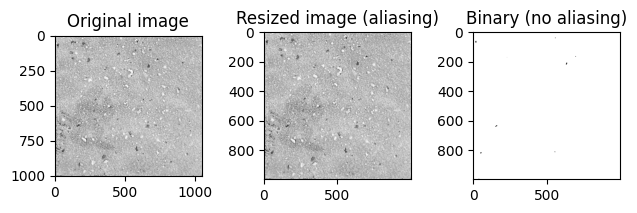

(1201, 998799, 0.1201)

In [32]:
logger.info(img_paths[1])
img_1 = io.imread(f"{pwd}/{img_paths[1]}", as_gray=True)

# entr_img = entropy(a_img, disk(1))
logger.info(img_1.shape)
get_pixel_count(img_1, debug=True, fname=img_paths[1])

2023-08-03 07:18:10.018 | INFO     | __main__:<module>:1 - After B26.jpg
2023-08-03 07:18:10.094 | INFO     | __main__:get_pixel_count:5 - Best threshold 0.6243524433521871
2023-08-03 07:18:10.095 | INFO     | __main__:get_pixel_count:7 - Original Image (963, 982) -> (1000, 1000)
2023-08-03 07:18:10.096 | INFO     | __main__:get_pixel_count:10 - After B26.jpg
/tmp/ipykernel_7958/217959107.py:11: UserWarning: binary_output/bin_After B26.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(f"binary_output/bin_{fname}", binary_img)
2023-08-03 07:18:10.117 | INFO     | __main__:get_pixel_count:14 - Debugging enabled.
2023-08-03 07:18:10.120 | INFO     | __main__:get_pixel_count:15 - white pixel -> 981538 | black pixel 18462.


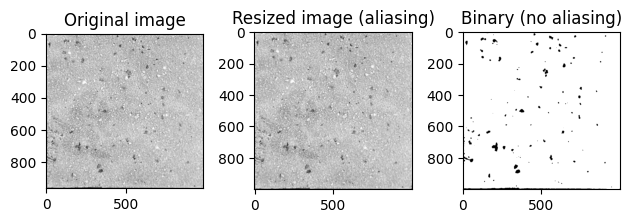

(18462, 981538, 1.8461999999999998)

In [33]:
logger.info(img_paths[0])
img_2 = io.imread(f"{pwd}/{img_paths[0]}", as_gray=True)
# entr_img = entropy(a_img, disk(1))
get_pixel_count(img_2, debug=True, fname=img_paths[0])

# Main Loop

In [21]:
root = "./Before and after pictures/"
all_folders = os.listdir(root)
debug = False

output = []
for folder in all_folders:
    folder_path = os.path.join(root, folder)
    img_paths = os.listdir(folder_path)
    f_output = {}
    f_output["folder_path"] = folder
    for img_name in img_paths:
        col = img_name.split()[0].lower()
        img_path = os.path.join(folder_path, img_name)
        logger.info(img_path)
        img = io.imread(img_path, as_gray=True)
        bp, wp, bpp = get_pixel_count(img, debug=debug, fname=img_name)
        logger.info(f"{col} {bp} {wp}")
        f_output.update(
            {
                f"black pixel {col.upper()}" : bp,
                f"white pixel {col.upper()} " : wp,
                f"Percent black pixel {col.upper()}" : bpp,
                f"total pixel {col.upper()}" : bp+wp,
            }
        )
    
        # break
    output.append(f_output)
    # break

2023-08-03 07:08:08.525 | INFO     | __main__:<module>:14 - ./Before and after pictures/M23/After M23.jpg
2023-08-03 07:08:08.596 | INFO     | __main__:get_pixel_count:5 - Best threshold 0.5111901110340389
2023-08-03 07:08:08.597 | INFO     | __main__:get_pixel_count:7 - Original Image (994, 1011) -> (1000, 1000)
2023-08-03 07:08:08.598 | INFO     | __main__:get_pixel_count:10 - After M23.jpg
/tmp/ipykernel_7958/217959107.py:11: UserWarning: binary_output/bin_After M23.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(f"binary_output/bin_{fname}", binary_img)
/tmp/ipykernel_7958/217959107.py:11: UserWarning: binary_output/bin_After M23.jpg is a low contrast image
  io.imsave(f"binary_output/bin_{fname}", binary_img)
2023-08-03 07:08:08.617 | INFO     | __main__:<module>:17 - after 1440 998560
2023-08-03 07:08:08.617 | INFO     | __main__:<module>:14 - ./Before and after pictures/M23/Before M23.j

In [22]:
df = pd.DataFrame(output)
df.head()

,folder_path,black pixel AFTER,white pixel AFTER,Percent black pixel AFTER,total pixel AFTER,black pixel BEFORE,white pixel BEFORE,Percent black pixel BEFORE,total pixel BEFORE
0,M23,1440,998560,0.1440,1000000,2989,997011,0.2989,1000000
1,B36,45693,954307,4.5693,1000000,11015,988985,1.1015,1000000
2,M26,3991,996009,0.3991,1000000,695,999305,0.0695,1000000
3,M28,1562,998438,0.1562,1000000,20958,979042,2.0958,1000000
4,B37,9593,990407,0.9593,1000000,2971,997029,0.2971,1000000


In [75]:
# output

In [25]:
x = "black pixel AFTER"
y = "black pixel BEFORE"

df["relative_change [(after-before)/before]"] = ((df[x] - df[y]) / df[y])*100
df.head()

,folder_path,black pixel AFTER,white pixel AFTER,Percent black pixel AFTER,total pixel AFTER,black pixel BEFORE,white pixel BEFORE,Percent black pixel BEFORE,total pixel BEFORE,relative_change [(after-before)/before]
0,M23,1440,998560,0.1440,1000000,2989,997011,0.2989,1000000,-51.823352
1,B36,45693,954307,4.5693,1000000,11015,988985,1.1015,1000000,314.825238
2,M26,3991,996009,0.3991,1000000,695,999305,0.0695,1000000,474.244604
3,M28,1562,998438,0.1562,1000000,20958,979042,2.0958,1000000,-92.546999
4,B37,9593,990407,0.9593,1000000,2971,997029,0.2971,1000000,222.887917


In [27]:
df.to_csv("aug_3_result.csv", index=False)